In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import jax
jax.config.update("jax_enable_x64", True)

In [3]:
from src import ComputationalHypergraphDiscovery as CHD
from src.ComputationalHypergraphDiscovery import interpolatory,non_interpolatory
from src.ComputationalHypergraphDiscovery import helper_functions as hf

In [4]:
import jax.numpy as np
from jax import random

# Example 1

$$\begin{matrix}x_1=w_1\\x_2=w_2 \end{matrix} $$

In [5]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))

X=np.concatenate([W[:,:2],W],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']    

In [6]:
graph_discovery=CHD.GraphDiscovery(X,node_names)#,kernels=[CHD.Modes.LinearMode()])

Finding ancestors: 100%|██████████| 6/6 [00:16<00:00,  2.80s/it, Finding ancestors of $w_4$]


Kernel [linear] has n/(n+s)=5.007648637252815e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.079774292187729e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0039504921346265355, Z=(0.84, 0.87), gamma=4.53e-02
$x_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $x_1$: ['$w_1$']



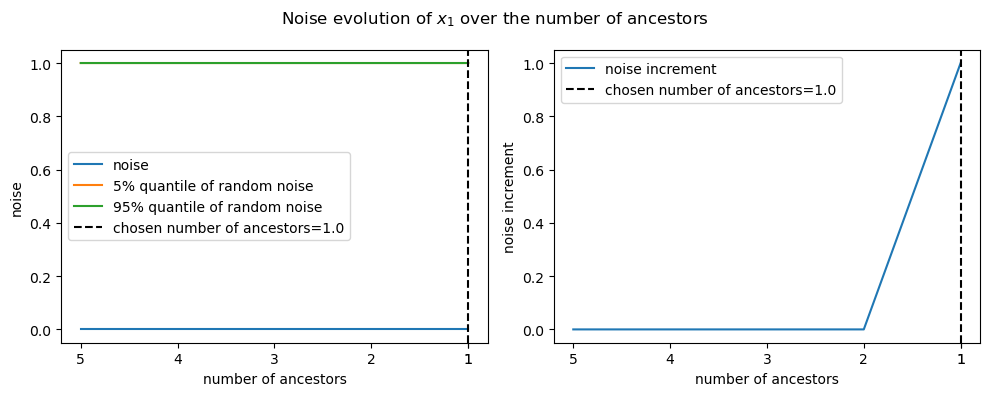

Kernel [linear] has n/(n+s)=5.012000125089104e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.038529030777031e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0036923969613462254, Z=(0.84, 0.87), gamma=4.51e-02
$x_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $x_2$: ['$w_2$']



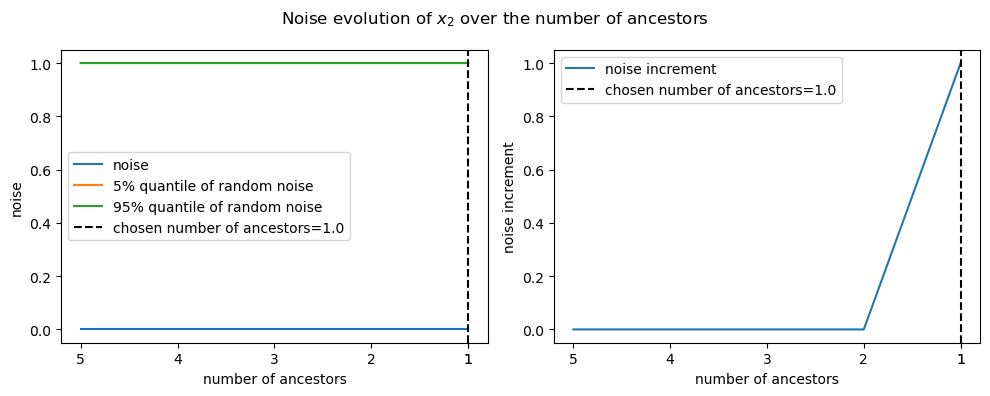

Kernel [linear] has n/(n+s)=5.007643171763516e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.079265053376699e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003950492134629488, Z=(0.84, 0.87), gamma=4.53e-02
$w_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $w_1$: ['$x_1$']



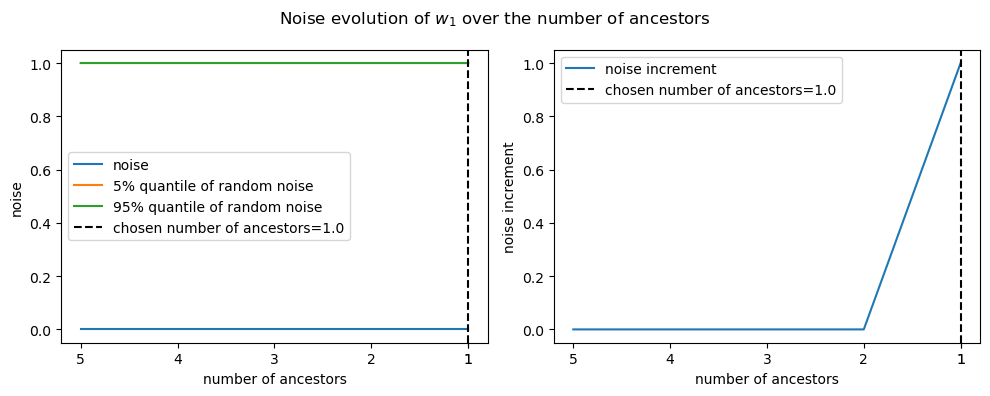

Kernel [linear] has n/(n+s)=5.01200887216907e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.038372120784373e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003692396961344865, Z=(0.84, 0.87), gamma=4.51e-02
$w_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $w_2$: ['$x_2$']



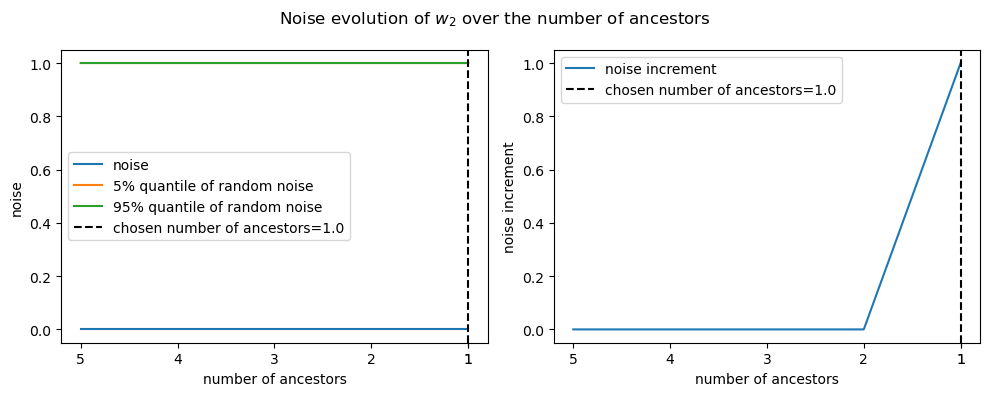

Kernel [linear] has n/(n+s)=0.9993155231868839, Z=(1.00, 1.00), gamma=9.97e+02
Kernel [quadratic] has n/(n+s)=0.9977502892540305, Z=(1.00, 1.00), gamma=9.87e+02
Kernel [gaussian] has n/(n+s)=0.9284812907318742, Z=(0.92, 0.94), gamma=1.19e-04
$w_3$ has no ancestors

Kernel [linear] has n/(n+s)=0.9991431746435814, Z=(1.00, 1.00), gamma=9.96e+02
Kernel [quadratic] has n/(n+s)=0.9981532694453729, Z=(1.00, 1.00), gamma=9.90e+02
Kernel [gaussian] has n/(n+s)=0.9234953312006231, Z=(0.92, 0.94), gamma=1.23e-04
$w_4$ has no ancestors



In [7]:
graph_discovery.fit()

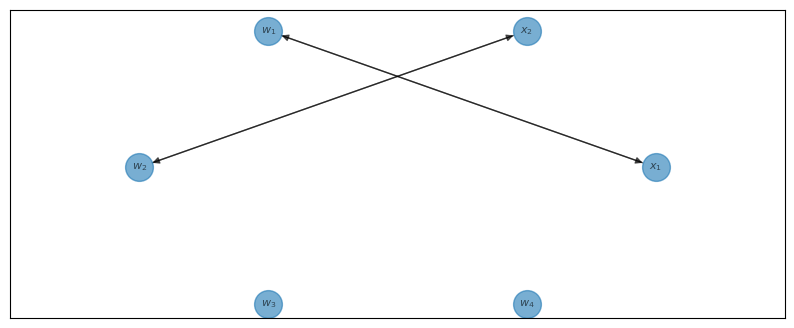

In [10]:
graph_discovery.plot_graph(type_label=False)

# Example 2

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^2+1+0.1w_2\\x_3&=&w_3 \end{matrix} $$

In [12]:
path_old_CHD='/Users/theobourdais/Desktop'
#add to path
import sys
sys.path.append(path_old_CHD)
from ComputationalHypergraphDiscovery.src import ComputationalHypergraphDiscovery as CHD_old

In [11]:

key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**2+1+0.1*W[:,1]
X3=W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']

In [13]:
graph_discovery=CHD.GraphDiscovery(X,node_names)
old_graph_discovery=CHD_old.GraphDiscovery(X.T,node_names)

In [20]:
which_dim=np.array([1]*6+[0])

In [35]:
g=CHD.Modes.QuadraticMode()#GaussianMode(l=1)

In [36]:
Y=X[:,-1]

In [37]:
K=g(X,X,which_dim=which_dim)
K

Array([[ 21.67956407,   9.58943981,   2.8092224 , ...,   4.89464839,
          9.63300649,  26.28710539],
       [  9.58943981,  10.94165572,   4.51469431, ...,   5.95300403,
          9.28460042,  49.27009576],
       [  2.8092224 ,   4.51469431,  57.28023415, ...,  49.44861004,
          4.38894417,  37.24675548],
       ...,
       [  4.89464839,   5.95300403,  49.44861004, ...,  46.54477469,
          5.79659426,  32.9252219 ],
       [  9.63300649,   9.28460042,   4.38894417, ...,   5.79659426,
          8.1475452 ,  37.66591137],
       [ 26.28710539,  49.27009576,  37.24675548, ...,  32.9252219 ,
         37.66591137, 476.24391573]], dtype=float64)

In [38]:
CHD_old.GraphDiscovery._find_gamma(K=K, interpolatory=False, Y=Y, gamma_min=1e-9, printer=print, tol=1e-10)

1028.7271062098835

In [39]:
eigenvalues=np.linalg.eigvalsh(K)

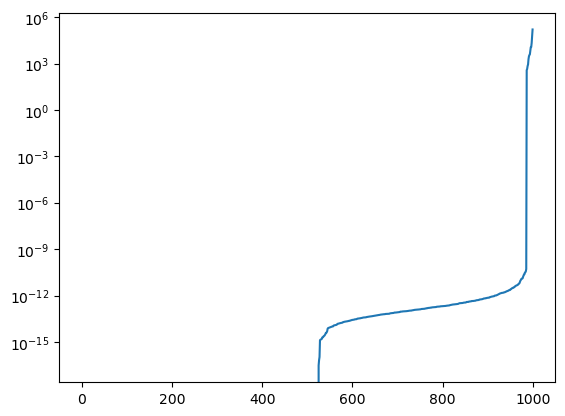

In [40]:
import matplotlib.pyplot as plt

plt.plot(eigenvalues)
plt.yscale('log')

In [41]:
non_interpolatory.find_gamma(K=K, Y=Y, gamma_min=1e-9)

Array(1031.1363026, dtype=float64)

In [42]:
interpolatory.find_gamma(eigenvalues=eigenvalues,gamma_min=1e-9)

Array(1.e-09, dtype=float64)

In [59]:
yb2, noise2, Z_low2, Z_high2, gamma2,_=interpolatory.perform_regression(K=K, ga=Y,gamma=None, gamma_min=1e-9,key=key)

In [60]:
yb, noise, (Z_low, Z_high), gamma= CHD_old.GraphDiscovery._perform_regression(K, ga=Y, gamma=gamma2, gamma_min=None, printer=None, interpolatory=None)

In [61]:
print(yb[:10])
print(yb2[:10])

[ 2.15327567e+08 -3.32203105e+08 -8.68325955e+08  1.38594911e+09
 -1.06665253e+09  6.98259675e+08  1.23184673e+09  7.78980848e+08
 -9.79434011e+08 -7.38334053e+08]
[ 2.14980225e+08 -4.16725085e+08 -8.69745110e+08  1.39135722e+09
 -1.07162471e+09  7.18713308e+08  1.22648339e+09  7.67711265e+08
 -9.82184812e+08 -7.37678695e+08]


In [62]:
print(noise)
print(noise2)

0.99968246170866
1.0001849144467938


In [63]:
print(Z_low)
print(Z_low2)

0.9995754549390363
0.9997869030497204


In [16]:
old_graph_discovery.fit(['$w_4$'])

finding ancestors of $w_4$
linear kernel (using gamma=9.96e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=9.86e+02)
 n/(n+s)=1.00, Z=1.00
gaussian kernel (using gamma=9.70e-05)
 n/(n+s)=0.91, Z=0.91
$w_4$ has no ancestors





Finding ancestors: 100%|██████████| 1/1 [00:03<00:00,  3.64s/it, Finding ancestors of $w_4$]

Kernel [linear] has n/(n+s)=0.9992728139736985, Z=(1.00, 1.00), gamma=9.96e+02
Kernel [quadratic] has n/(n+s)=0.9976129906935082, Z=(1.00, 1.00), gamma=9.86e+02
Kernel [gaussian] has n/(n+s)=0.9123512851979084, Z=(0.91, 0.94), gamma=1.39e-03
$w_4$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.91)
Ancestors of $w_4$: ['$x_2$', '$w_2$', '$w_3$']



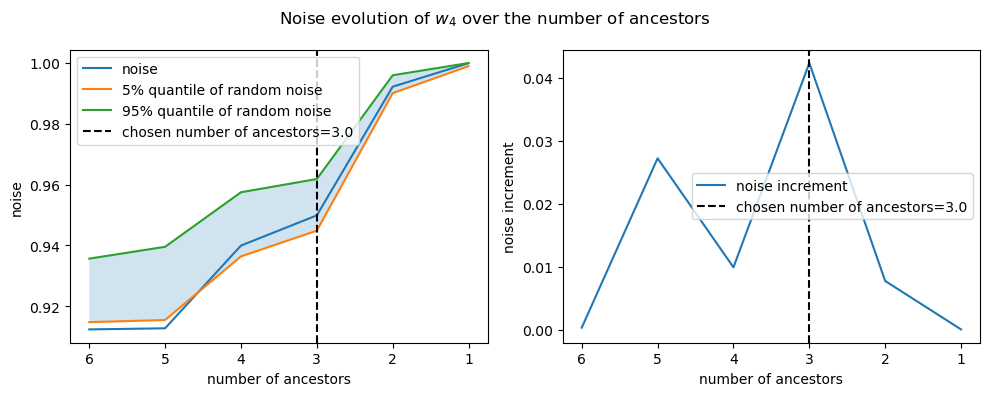

In [19]:
graph_discovery.fit(['$w_4$'])

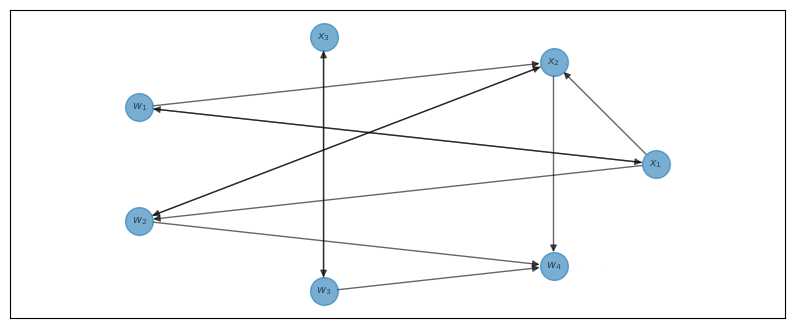

In [52]:
graph_discovery.plot_graph(type_label=False)

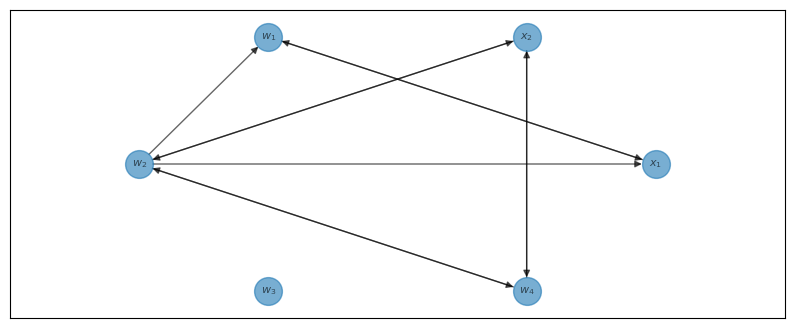

In [60]:
old_graph_discovery.plot_graph(type_label=False)

# Example 3

$$\begin{matrix}x_1&=&w_1w_2\\x_2&=&w_2\sin(w_4)\end{matrix} $$

In [53]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]*W[:,1]
X2=W[:,1]*np.sin(W[:,3])
X=np.concatenate([np.stack([X1,X2],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$'] 
  

In [34]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

Finding ancestors:   0%|          | 0/6 [00:00<?, ?it/s, Finding ancestors of $x_1$]

Finding ancestors: 100%|██████████| 6/6 [00:15<00:00,  2.51s/it, Finding ancestors of $w_4$]


Kernel [linear] has n/(n+s)=0.9996230091699854, Z=(1.00, 1.00), gamma=9.98e+02
Kernel [quadratic] has n/(n+s)=5.539667747418247e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.001195772093297785, Z=(0.83, 0.86), gamma=9.21e-02
$x_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_1$: ['$w_1$', '$w_2$']



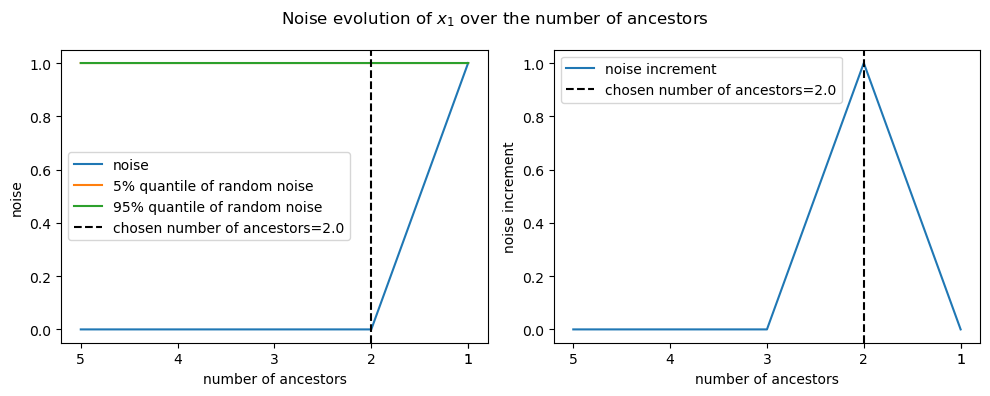

Kernel [linear] has n/(n+s)=0.9989215451614148, Z=(1.00, 1.00), gamma=9.95e+02
Kernel [quadratic] has n/(n+s)=0.7476557237478941, Z=(1.00, 1.00), gamma=1.51e+02
Kernel [gaussian] has n/(n+s)=0.04343797257614267, Z=(0.84, 0.87), gamma=7.48e-02
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.04)
Ancestors of $x_2$: ['$w_2$', '$w_4$']



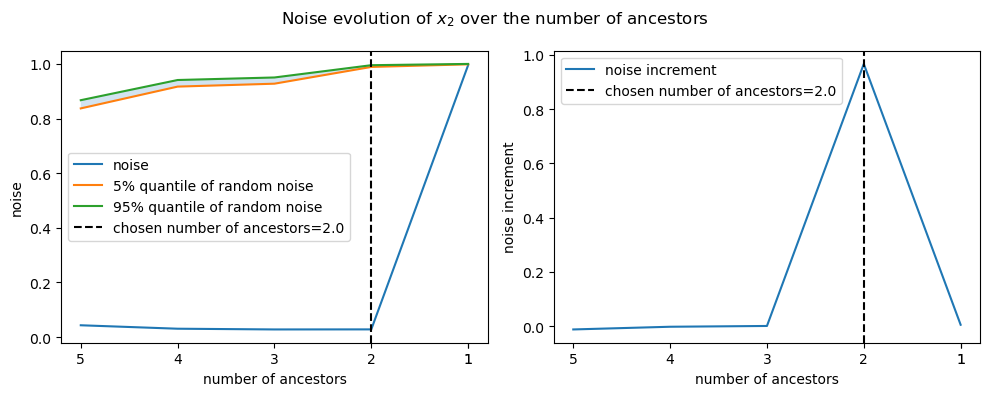

Kernel [linear] has n/(n+s)=0.9986058479249883, Z=(1.00, 1.00), gamma=9.94e+02
Kernel [quadratic] has n/(n+s)=0.9482889332431987, Z=(0.99, 1.00), gamma=6.43e+02
Kernel [gaussian] has n/(n+s)=0.8731721686349121, Z=(0.85, 0.88), gamma=3.82e-02
$w_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.95)
Ancestors of $w_1$: ['$x_1$', '$w_2$']



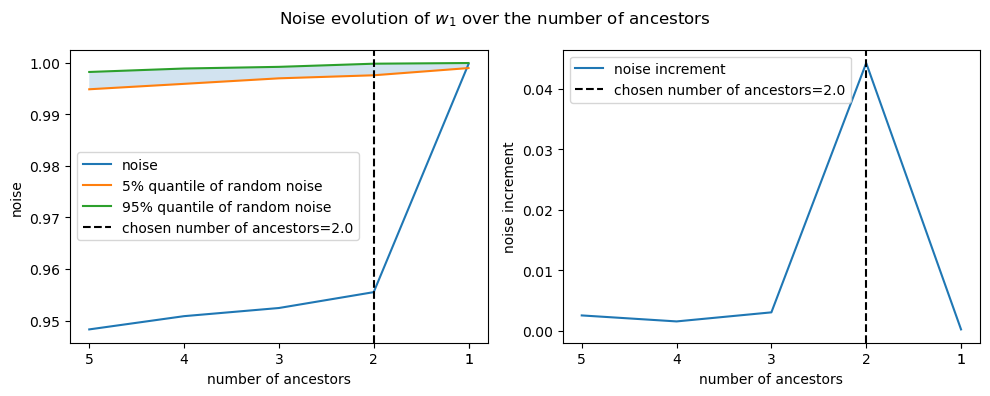

Kernel [linear] has n/(n+s)=0.9984382159090663, Z=(1.00, 1.00), gamma=9.93e+02
Kernel [quadratic] has n/(n+s)=0.8933717854048463, Z=(1.00, 1.00), gamma=3.35e+02
Kernel [gaussian] has n/(n+s)=0.8214033677241678, Z=(0.84, 0.87), gamma=8.93e-02
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.82)
Ancestors of $w_2$: ['$x_1$', '$x_2$', '$w_1$', '$w_3$', '$w_4$']



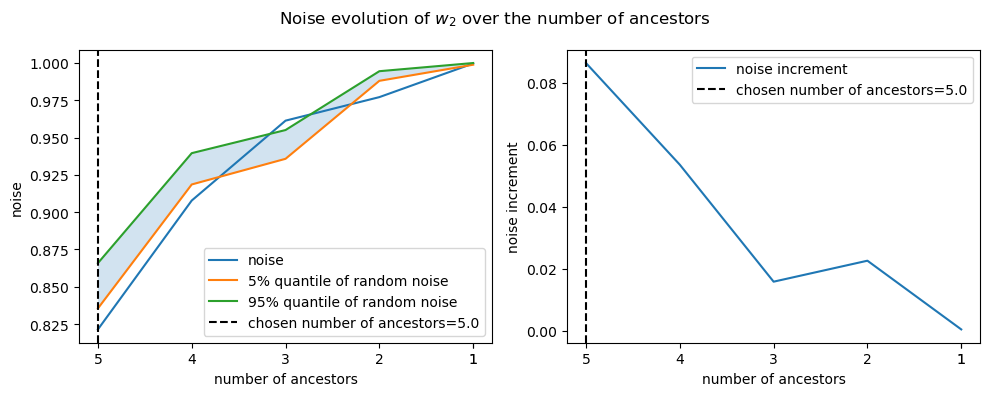

Kernel [linear] has n/(n+s)=0.9991714429679727, Z=(1.00, 1.00), gamma=9.96e+02
Kernel [quadratic] has n/(n+s)=0.9980203398784476, Z=(0.99, 1.00), gamma=9.88e+02
Kernel [gaussian] has n/(n+s)=0.9326693544119591, Z=(0.90, 0.93), gamma=1.85e-03
$w_3$ has no ancestors

Kernel [linear] has n/(n+s)=0.9981674111286347, Z=(1.00, 1.00), gamma=9.92e+02
Kernel [quadratic] has n/(n+s)=0.9635974447076064, Z=(0.99, 1.00), gamma=7.18e+02
Kernel [gaussian] has n/(n+s)=0.888017977495956, Z=(0.86, 0.89), gamma=2.84e-02
$w_4$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.96)
Ancestors of $w_4$: ['$x_2$', '$w_2$']



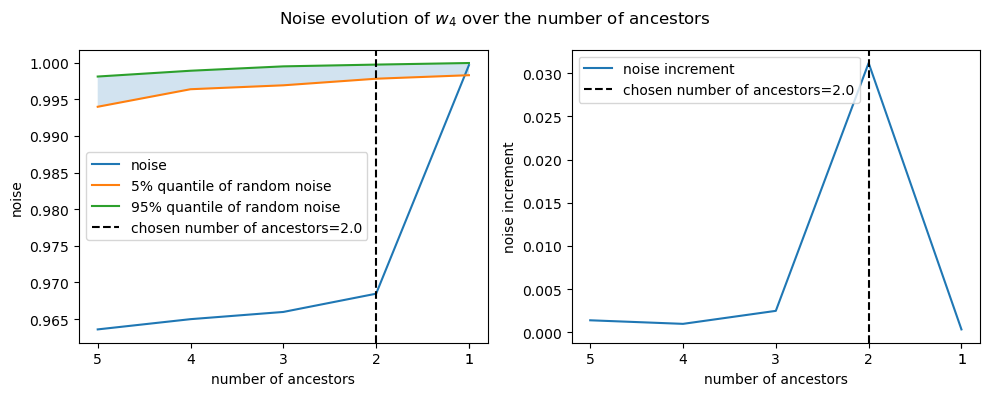

In [35]:
graph_discovery.fit()

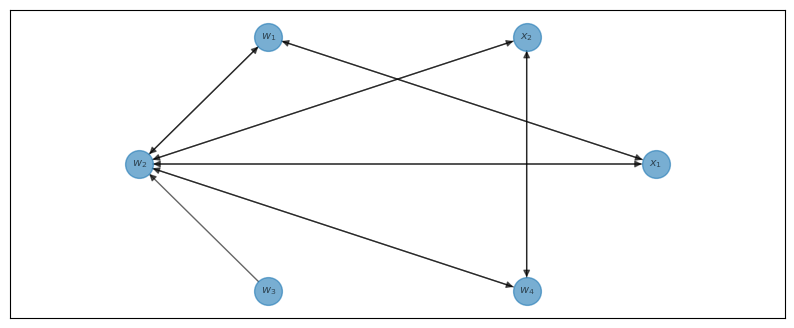

In [36]:
graph_discovery.plot_graph(type_label=False)

# Example 4

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^3+1+0.1w_2\\x_3&=&(x_1+2)^3+0.1w_3\end{matrix} $$

In [37]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**3+1+0.1*W[:,1]
X3=(X1+2)**3+0.1*W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']  

In [38]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

Finding ancestors: 100%|██████████| 7/7 [00:17<00:00,  2.55s/it, Finding ancestors of $w_4$]

Kernel [linear] has n/(n+s)=2.1915256366129756e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.3925800235399179e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003112971611635594, Z=(0.84, 0.87), gamma=1.25e-01
$x_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_1$: ['$w_1$']



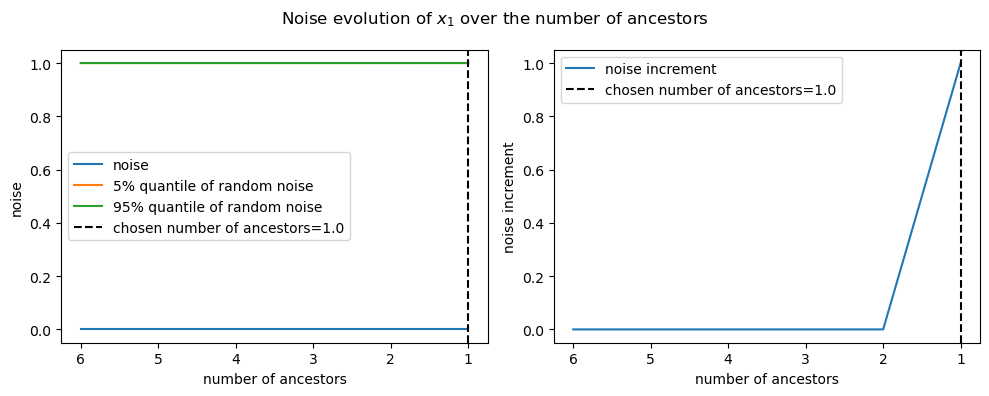

Kernel [linear] has n/(n+s)=0.907983908628638, Z=(1.00, 1.00), gamma=3.65e+02
Kernel [quadratic] has n/(n+s)=2.421469353340968e-09, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.013096659340034223, Z=(0.84, 0.87), gamma=1.39e-01
$x_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_2$: ['$x_1$', '$x_3$', '$w_1$', '$w_2$', '$w_3$']



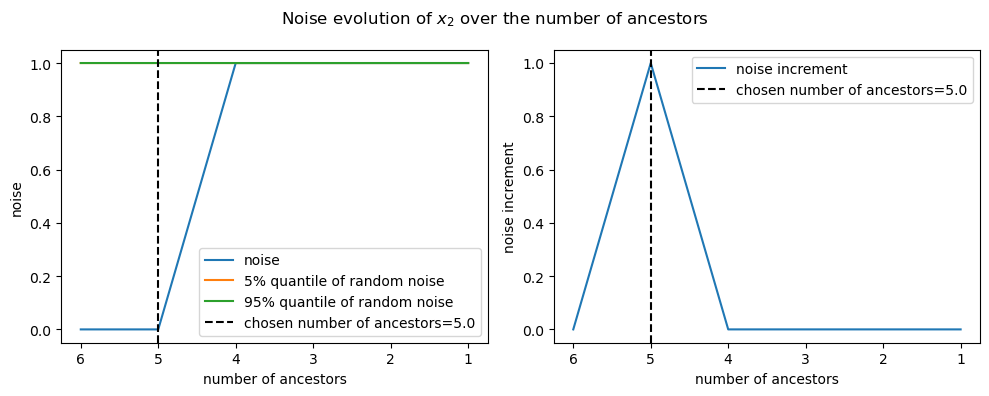

Kernel [linear] has n/(n+s)=0.88554541468443, Z=(1.00, 1.00), gamma=2.40e+02
Kernel [quadratic] has n/(n+s)=2.5539439753586557e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0009597102974142921, Z=(0.84, 0.87), gamma=1.32e-01
$x_3$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_3$: ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$']



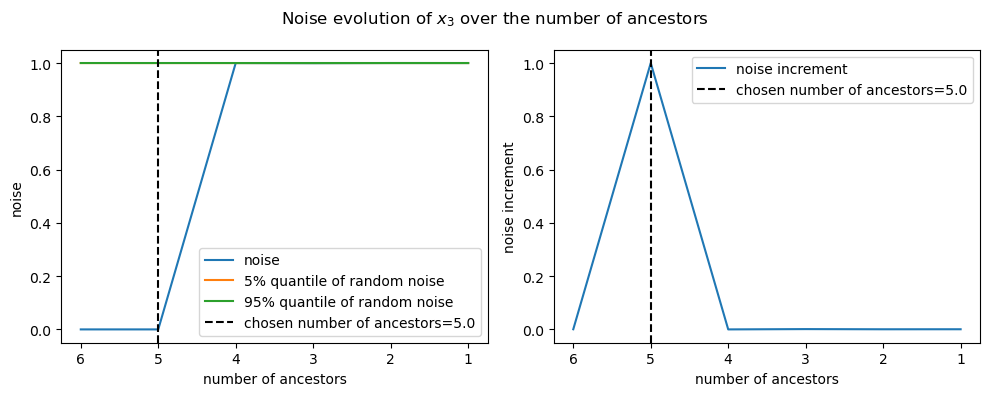

Kernel [linear] has n/(n+s)=2.1915271346269647e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.3925591866537034e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003112971611629095, Z=(0.84, 0.87), gamma=1.25e-01
$w_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $w_1$: ['$x_1$']



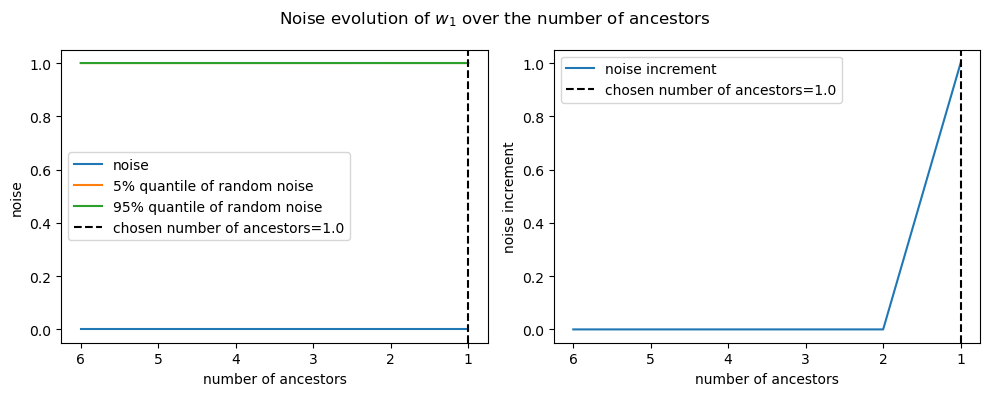

Kernel [linear] has n/(n+s)=0.9965027935028195, Z=(1.00, 1.00), gamma=9.85e+02
Kernel [quadratic] has n/(n+s)=4.215680383129874e-06, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.035093149020202594, Z=(0.89, 0.92), gamma=1.26e-03
$w_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $w_2$: ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_3$']



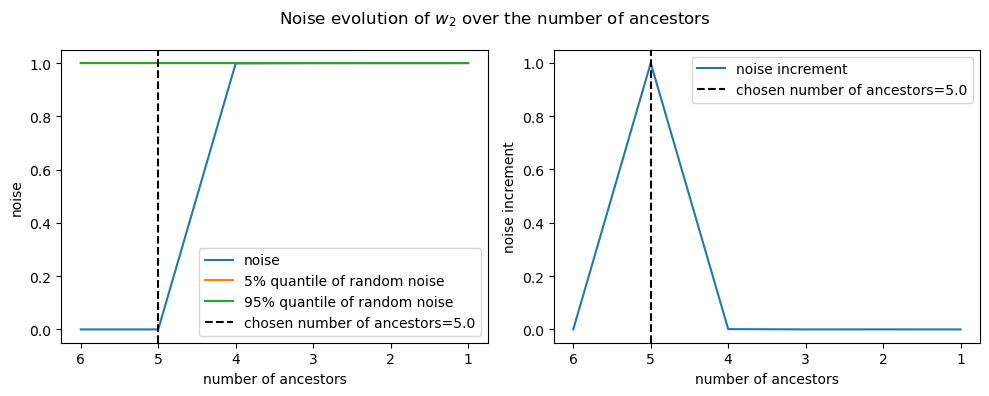

Kernel [linear] has n/(n+s)=0.9996671704572304, Z=(1.00, 1.00), gamma=9.98e+02
Kernel [quadratic] has n/(n+s)=2.3507205770844808e-08, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.035274139825058455, Z=(0.90, 0.93), gamma=6.32e-04
$w_3$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $w_3$: ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_2$']



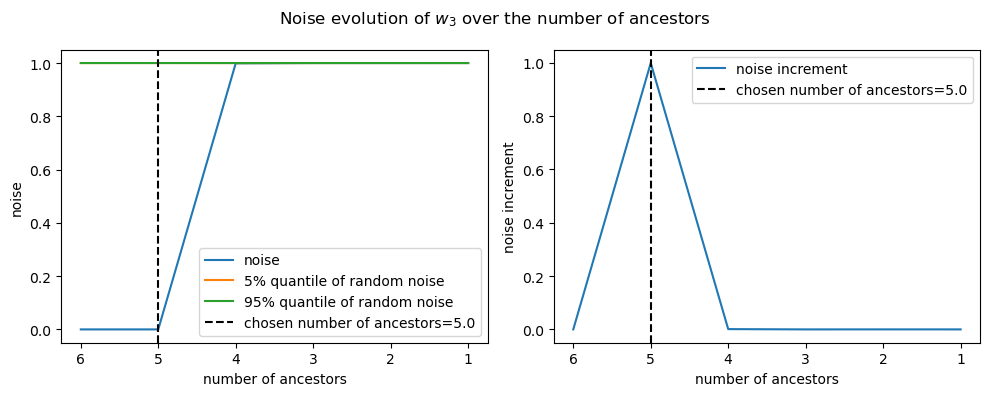

Kernel [linear] has n/(n+s)=0.9997767879719717, Z=(1.00, 1.00), gamma=9.98e+02
Kernel [quadratic] has n/(n+s)=0.9983163998796099, Z=(1.00, 1.00), gamma=9.90e+02
Kernel [gaussian] has n/(n+s)=0.9309536669795929, Z=(0.92, 0.94), gamma=2.81e-04
$w_4$ has no ancestors



In [39]:
graph_discovery.fit()

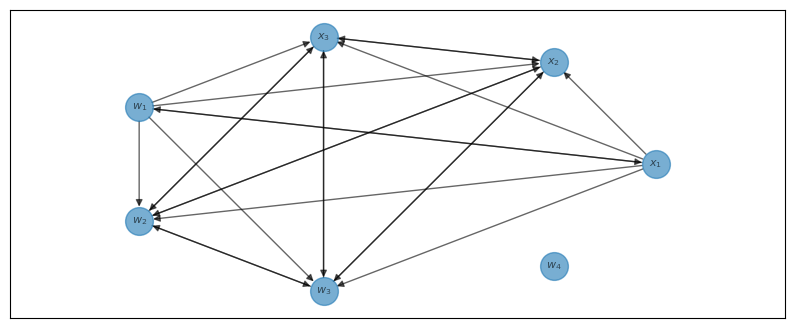

In [40]:
graph_discovery.plot_graph(type_label=False)